## Importing the python module

In [104]:
#Data Analysis
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

#Data Visualization

#Seaborn and Matplotlib Visualization
import matplotlib                  # 2D Plotting Library
import matplotlib.pyplot as plt
import seaborn as sns              # Python Data Visualization Library based on matplotlib
import geopandas as gpd            # Python Geospatial Data Library
plt.style.use('fivethirtyeight')
%matplotlib inline

#Plotly Visualizations
import plotly as plotly             
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)

#Spatial Visualizations
import folium
import folium.plugins

#Machine Learning
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor

In [105]:
df = pd.read_csv('/D.A/Proj1/Airbnb/listings.csv')

In [106]:
#by default head shows us top 5 records
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,266763,Francesca,North Region,Woodlands,1.44255,103.79580,Private room,83,180,1,2013-10-21,0.01,2,365
1,50646,Pleasant Room along Bukit Timah,227796,Sujatha,Central Region,Bukit Timah,1.33235,103.78521,Private room,81,90,18,2014-12-26,0.28,1,365
2,56334,COZICOMFORT,266763,Francesca,North Region,Woodlands,1.44246,103.79667,Private room,69,6,20,2015-10-01,0.20,2,365
3,71609,Ensuite Room (Room 1 & 2) near EXPO,367042,Belinda,East Region,Tampines,1.34541,103.95712,Private room,206,1,14,2019-08-11,0.15,9,353
4,71896,B&B Room 1 near Airport & EXPO,367042,Belinda,East Region,Tampines,1.34567,103.95963,Private room,94,1,22,2019-07-28,0.22,9,355


In [107]:
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 7907 rows and 16 columns


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7907 entries, 0 to 7906
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              7907 non-null   int64  
 1   name                            7905 non-null   object 
 2   host_id                         7907 non-null   int64  
 3   host_name                       7907 non-null   object 
 4   neighbourhood_group             7907 non-null   object 
 5   neighbourhood                   7907 non-null   object 
 6   latitude                        7907 non-null   float64
 7   longitude                       7907 non-null   float64
 8   room_type                       7907 non-null   object 
 9   price                           7907 non-null   int64  
 10  minimum_nights                  7907 non-null   int64  
 11  number_of_reviews               7907 non-null   int64  
 12  last_review                     51

In [109]:
#finding count of total null values in each column
df.isna().sum()

id                                   0
name                                 2
host_id                              0
host_name                            0
neighbourhood_group                  0
neighbourhood                        0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimum_nights                       0
number_of_reviews                    0
last_review                       2758
reviews_per_month                 2758
calculated_host_listings_count       0
availability_365                     0
dtype: int64

** Dealing with missing values**

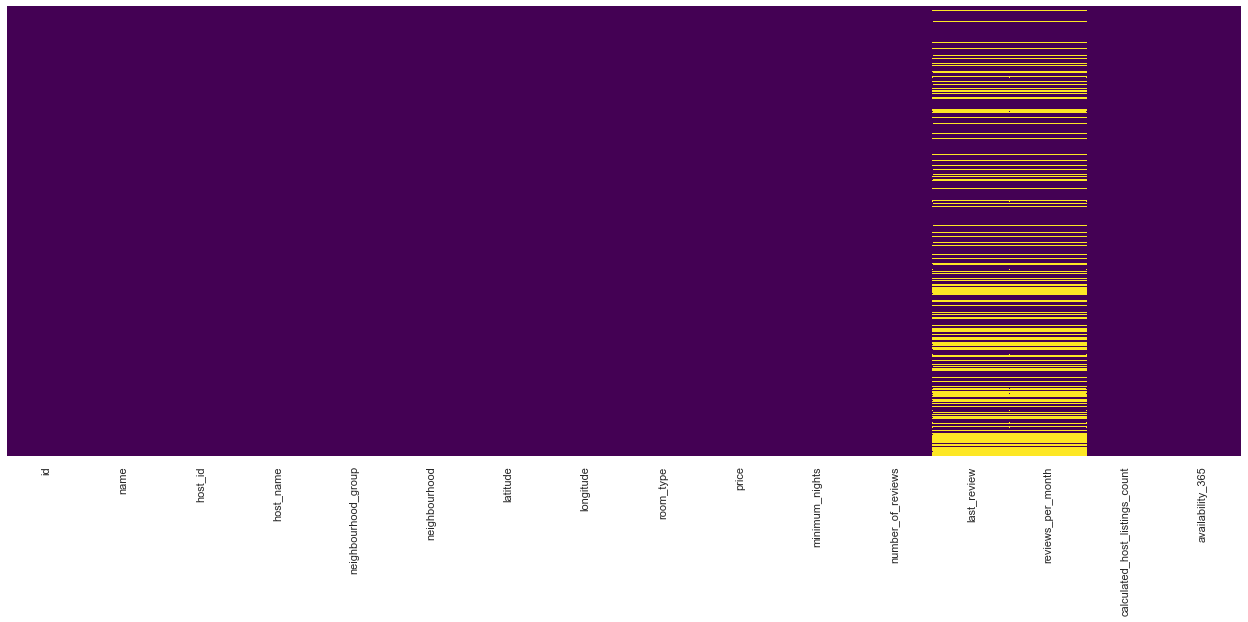

In [110]:
sns.set(rc={'figure.figsize':(19.7,8.27)})

sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [111]:
#Fields not needed to our problem
to_drop = ["last_review","reviews_per_month"]
    
# Drop selected fields in place
df.drop(to_drop, inplace=True, axis=1)    

In [112]:
df.dropna(inplace=True)
df.shape

(7905, 14)

## Exploratory Data Analysis

count     7905.000000
mean       169.284883
std        340.185801
min          0.000000
25%         65.000000
50%        124.000000
75%        199.000000
max      10000.000000
Name: price, dtype: float64


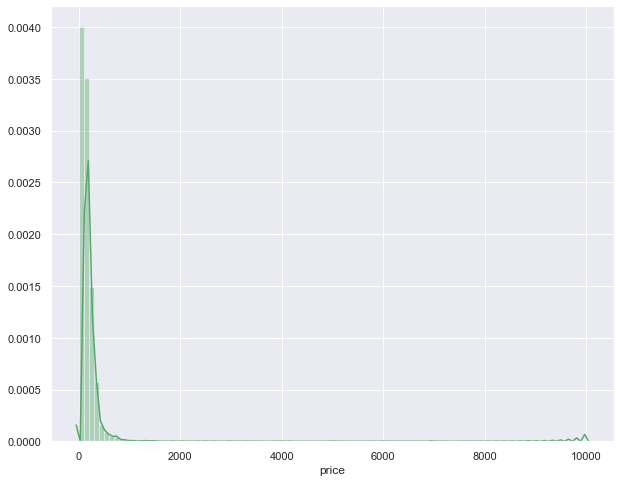

In [113]:
print(df['price'].describe())

plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

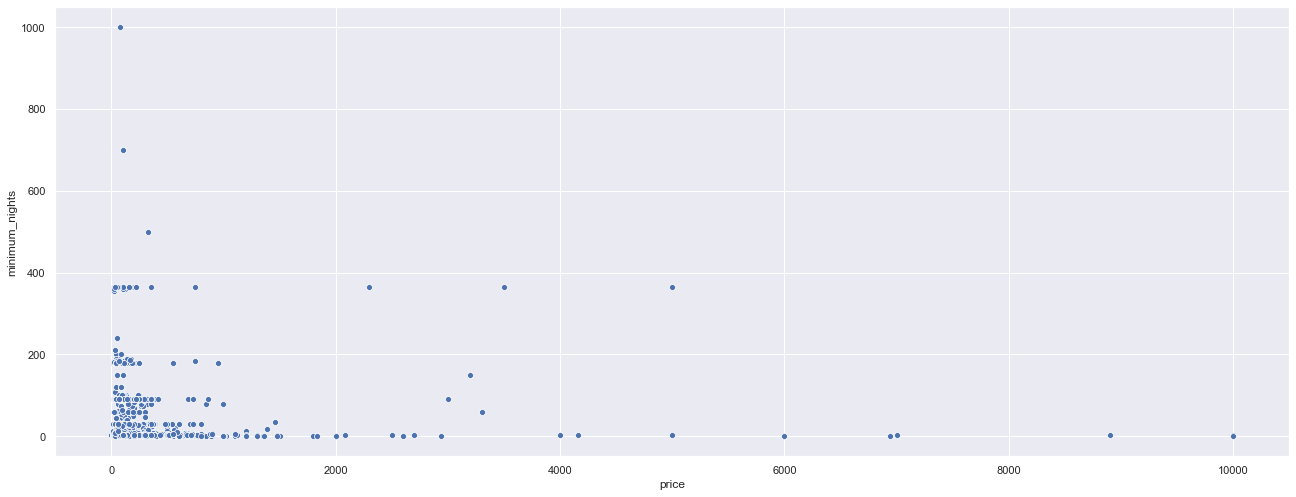

In [114]:
sns.scatterplot(x='price',y='minimum_nights',data=df)

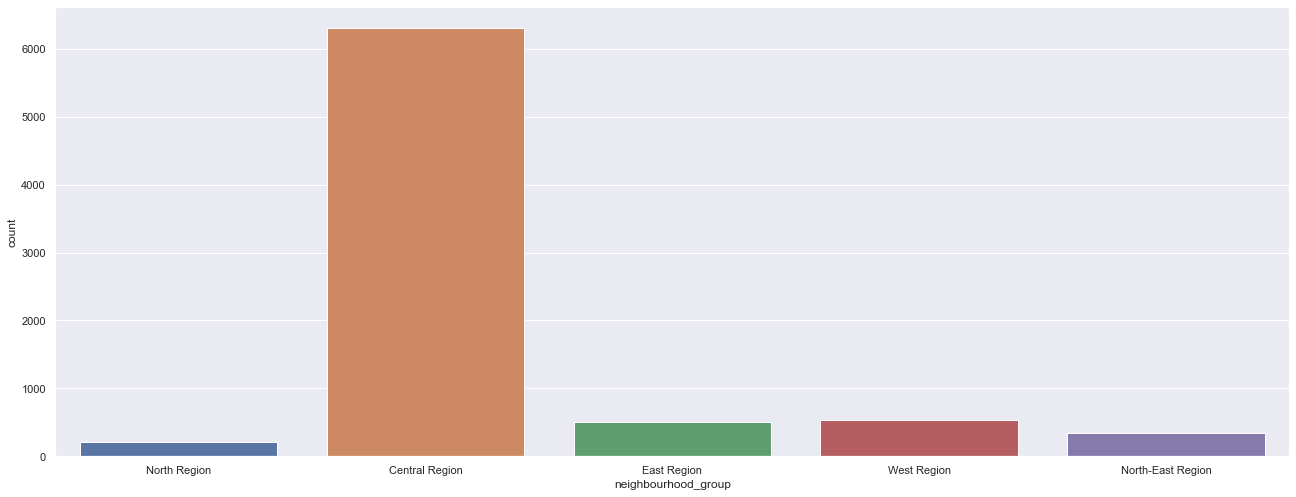

In [115]:
sns.countplot(df["neighbourhood_group"])

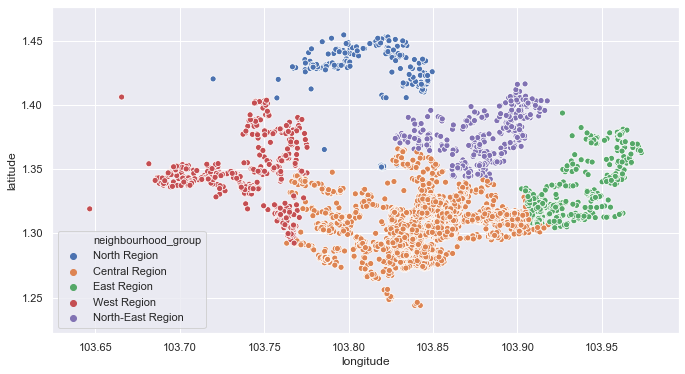

In [116]:
plt.figure(figsize=(10,6))
sns.scatterplot(df.longitude,df.latitude,hue=df.neighbourhood_group)
plt.ioff()

**Hotel Distribution through a Heat Map**

In [117]:
import folium
from folium.plugins import HeatMap
m=folium.Map([1.44255,103.79580],zoom_start=11)
HeatMap(df[['latitude','longitude']].dropna(),radius=8,gradient={0.2:'blue',0.4:'purple',0.6:'orange',1.0:'red'}).add_to(m)
display(m)

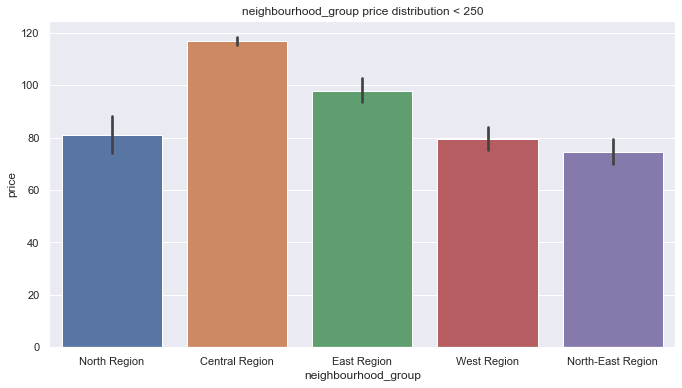

In [118]:
ng = df[df.price <250]
plt.figure(figsize=(10,6))
sns.barplot(y="price",x ='neighbourhood_group' ,data = ng)
plt.title("neighbourhood_group price distribution < 250")
plt.show()

> > As shown above: Central_Region has the most expensive accomodation while the most budget friendly is in North-East_Region.

 **Getting the room details**

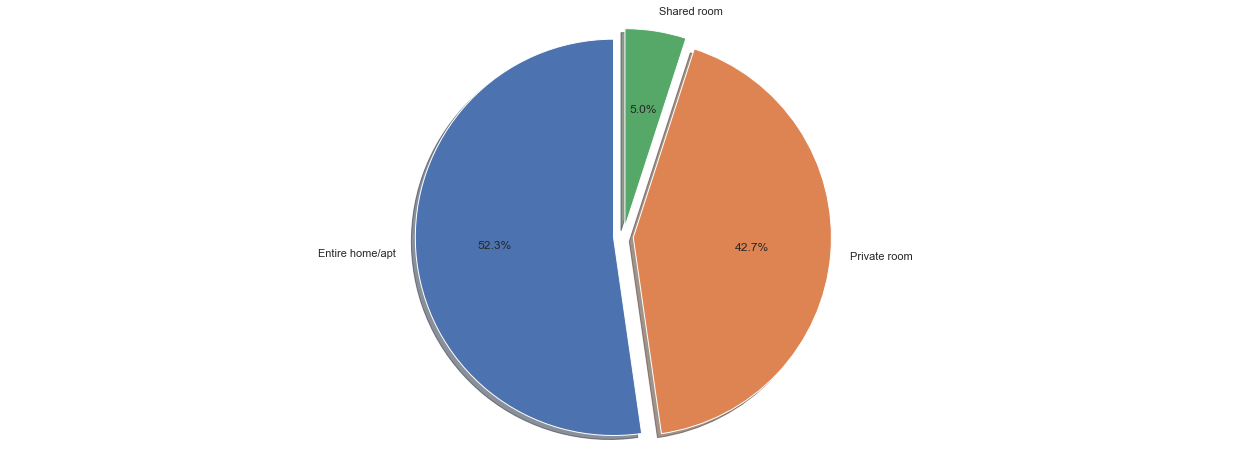

In [119]:
import matplotlib.pyplot as plt
roomdf = df.groupby('room_type').size()/df['room_type'].count()*100
labels = roomdf.index
values = roomdf.values
explode = (0.05, 0.05, 0.05)

fig1, ax1 = plt.subplots()
ax1.pie(values, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

> > We can see that Entirehome/apt is most prefered and Shared room is least preffered

**Room types occupied by neighbourhood_group**

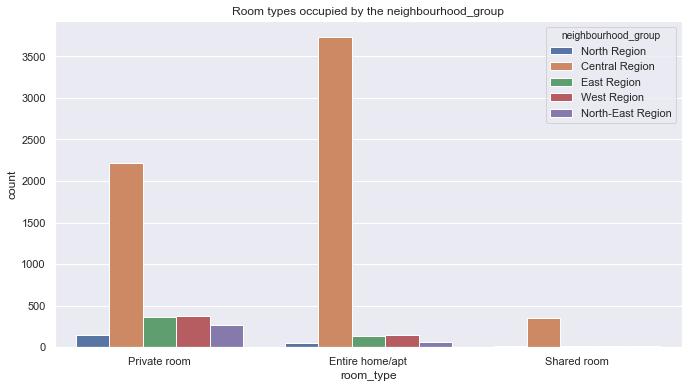

In [120]:
plt.figure(figsize=(10,6))
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = df)
plt.title("Room types occupied by the neighbourhood_group")
plt.show()

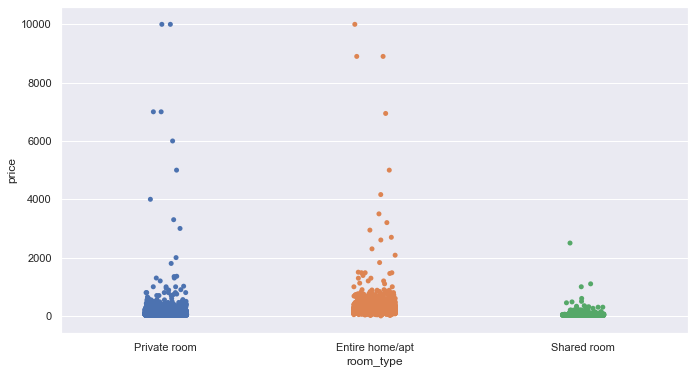

In [121]:
#catplot room type and price
plt.figure(figsize=(10,6))
sns.stripplot(x="room_type", y="price", data=df)

> >We can clearly see that most of all room types lie below 2000. 

**Sorting rooms according to maximum number of reviews**

In [122]:
df1=df.sort_values(by=['number_of_reviews'],ascending=False).head(1000)
df1.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
132,2129215,Luxuriously Spacious Studio Apt.,7642747,Shirley,East Region,Bedok,1.32122,103.91492,Entire home/apt,139,2,323,1,239
140,2357514,Heritage Shophouse Right in Epicentre of Sights,1346787,Val,Central Region,Outram,1.28448,103.84360,Private room,69,1,307,3,315
470,5827998,The Lily Room,30080617,Eddie,East Region,Tampines,1.34463,103.96107,Private room,60,2,296,7,0
1237,10848771,Spacious room near Woodleigh MRT,44793532,Yuan,Central Region,Toa Payoh,1.33431,103.87554,Private room,49,1,296,2,288
722,7605283,"Clean cosy room, 7 mins to Sentosa",34333799,Felix,Central Region,Bukit Merah,1.27718,103.82167,Private room,72,3,291,1,186


**Room Availability**

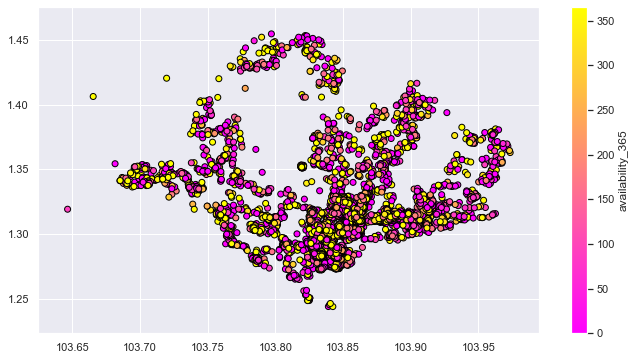

In [123]:
plt.figure(figsize=(10,6))
plt.scatter(df.longitude, df.latitude, c=df.availability_365, cmap='spring', edgecolor='black', linewidth=1\
            , alpha=1)

cbar = plt.colorbar()
cbar.set_label('availability_365')

> > Yellow color dots denote the better Room Availabilty.

## Using Predictive Model

In [124]:
#prepare data
df.drop(['name','id','host_name'],axis=1,inplace=True)


**Converting categorical features to numeric features**

In [125]:
'''Encode labels with value between 0 and n_classes-1.'''
le = preprocessing.LabelEncoder()                                            # Fit label encoder
le.fit(df['neighbourhood_group'])
df['neighbourhood_group']=le.transform(df['neighbourhood_group'])    # Transform labels to normalized encoding.

le = preprocessing.LabelEncoder()
le.fit(df['neighbourhood'])
df['neighbourhood']=le.transform(df['neighbourhood'])

le = preprocessing.LabelEncoder()
le.fit(df['room_type'])
df['room_type']=le.transform(df['room_type'])

df.sort_values(by='price',ascending=True,inplace=True)

df.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
3168,114674497,0,29,1.30954,103.85271,0,0,3,9,6,351
2567,108408404,0,19,1.30823,103.89461,1,14,2,1,1,0
7674,29799617,0,11,1.31455,103.88323,0,14,3,4,1,34
7249,75175440,4,5,1.38400,103.76309,0,14,1,1,2,0
2557,21900076,1,1,1.33698,103.93293,2,14,1,0,2,0


**Training a model**

In [126]:
#Train Linear Regression model

lm = LinearRegression()

X = df[['host_id','neighbourhood_group','neighbourhood','latitude','longitude','room_type','minimum_nights','number_of_reviews','calculated_host_listings_count','availability_365']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Getting predictions**

In [127]:
predicts = lm.predict(X_test)
error_airbnb = pd.DataFrame({
        'Actual Values': np.array(y_test).flatten(),
        'Predicted Values': predicts.flatten()})
error_airbnb.head()

,Actual Values,Predicted Values
0,287,245.724553
1,76,179.213096
2,99,227.199980
3,199,203.292430
4,218,166.522083
